In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import re

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.svm import SVR

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

## ML preeliminary testing

#### Create a helper class

In [11]:
class trainAndEvaluate:
    def __init__(self,df,model):
        self.df = df
        self.model = model
        
    def create_split(self):
        # Creating a holdout split
        ## Sets targets and set up test train_split
        X = self.df[[col for col in self.df.columns if col != 'price']]
        y = self.df['price']

        # Set up the split
        train_X, val_X, train_y, val_y = train_test_split(X,y)
        
        return (train_X, val_X, train_y, val_y)
    
    def KFold_score(self, n_folds = 10):
        X = self.df[[col for col in self.df.columns if col != 'price']]
        y = self.df['price']
        
        cv = KFold(n_splits = n_folds,
                   random_state = 1,
                   shuffle = True) 
        
        scores = cross_val_score(model,
                                 X,
                                 y,
                                 scoring='neg_mean_squared_error',
                                 cv = cv,
                                 n_jobs=-1)
        
        
    
    def regression_eval_nonn(self,
                             show_results = 1,
                             plot = 1,
                             target_log = 0):
        
    
        train_input,test_input,train_output,test_output  = self.create_split()
    
        self.model.fit(train_input, train_output)
        y_pred = self.model.predict(test_input)

         # extract line of best fit statistics
        slope, intercept, r_value, p_value, std_err = stats.linregress(test_output,y_pred)

        MAE = mean_absolute_error(test_output, y_pred)
        MSE = mean_squared_error(test_output, y_pred, squared = 1)
        RMSE = mean_squared_error(test_output, y_pred, squared = 0)
        N_RMSE = (mean_squared_error(test_output, y_pred, squared = 0))/(test_output.std())
        R2 = r2_score(test_output, y_pred)
        EV = explained_variance_score(test_output, y_pred)

        # Extract name from model __class__
        model_name = re.findall(r'(?<=\.)[a-zA-Z]+(?=\')',str(self.model.__class__))[0]

        if show_results:
            print('---------------')
            print(f'{model_name} Results: ')
            print('---------------')
#             print(f'MAE = {MAE:.2f} AED.')
#             print(f'MSE = {MSE:.2f} AED.')
#             print(f'RMSE = {RMSE:.2f} AED.')

            print(f'NRMSE = {N_RMSE:.2f} AED.')
            print(f'R^2 score = {R2:.2f}')
            print(f'EV = {EV:.2f}')
            if plot:
                print('\nRegression Line Metrics: ')
                print('---------------------------')
                print(f'r = {r_value:.2f}, p = {p_value:.2f}, err = {std_err:.2f}')
                # plot A vs. P plot with regression line
                sns.regplot(x = test_output, y = y_pred, line_kws = {'label': f' y = {slope:.1f} x + {intercept:.1f}'})
                plt.legend()
                plt.title(f'{model_name}')
                plt.xlabel('Actual Price (AED)')
                plt.ylabel('Predicted Price (AED)')
                plt.show()
        else:
            return ("""model_name,MAE,MSE,RMSE,""",N_RMSE,R2)

### Test with training data and some models

In [12]:
# Will iterate and inspect initial results from these models
models = [RandomForestRegressor(),
          XGBRegressor()]

### Normalized data, Untouched Output

In [13]:
df_norm = pd.read_csv('datasets/training/train_norm.csv')

In [14]:
df_norm.head()

,number,price,num_digits,unique_digits,num_zeros,max_group,max_group_second,shan_entrop,lv_dist,num_ones,...,15,16,17,18,19,20,21,22,23,24
0,0.012519,109000,0.666667,0.25,0.0,0.25,0.25,0.430677,0.141237,0.4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.031622,72000,0.666667,0.25,0.0,0.50,0.00,0.349398,0.532474,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.299923,24000,1.000000,0.25,0.5,0.50,0.25,0.418166,0.785567,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.077085,17500,0.666667,0.50,0.0,0.25,0.00,0.646015,0.229897,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.088203,17500,0.666667,0.50,0.0,0.25,0.00,0.646015,0.286082,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>

---------------
RandomForestRegressor Results: 
---------------
NRMSE = 0.49 AED.
R^2 score = 0.76
EV = 0.76

Regression Line Metrics: 
---------------------------
r = 0.88, p = 0.00, err = 0.01


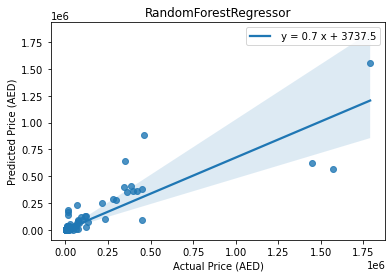

<IPython.core.display.Javascript object>

---------------
XGBRegressor Results: 
---------------
NRMSE = 0.63 AED.
R^2 score = 0.60
EV = 0.60

Regression Line Metrics: 
---------------------------
r = 0.84, p = 0.00, err = 0.02


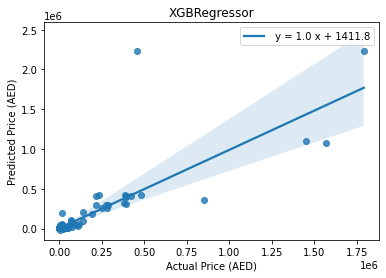

In [20]:
for model in models:
    trainAndEvaluate(df_norm,model).regression_eval_nonn()

In [29]:
df = pd.DataFrame({'y': [6, 8, 12, 14, 14, 15, 17, 22, 24, 23],
                   'x1': [2, 5, 4, 3, 4, 6, 7, 5, 8, 9],
                   'x2': [14, 12, 12, 13, 7, 8, 7, 4, 6, 5]})

#define predictor and response variables
X = df[['x1', 'x2']]
y = df['y']

#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle= True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_validate(model, X, y, scoring=['r2','neg_root_mean_squared_error'],
                         cv=cv, n_jobs=-1)

#view mean absolute error
scores

{'fit_time': array([0.00400186, 0.00299931, 0.00400114, 0.00400114, 0.00500131,
        0.00400114, 0.00400209, 0.00400114, 0.00400019, 0.00299978]),
 'score_time': array([0.00300097, 0.00400114, 0.00299978, 0.00300002, 0.00300074,
        0.00300097, 0.00299978, 0.00199962, 0.0030005 , 0.00200105]),
 'test_r2': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
 'test_neg_root_mean_squared_error': array([-1.37391167, -0.5800885 , -2.22270204, -3.88354531, -1.7159581 ,
        -6.76454294, -4.91317829, -3.37927664, -4.43852243, -2.18982218])}